In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib
import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # Mac
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐방지

In [2]:
np.linspace(1, 2, 6)

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

In [3]:
np.logspace(-3, 2, 6)
# array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
#        0.001   0.01    0.1     1       10      100

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
from sklearn.svm import SVC

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [7]:
np.array(np.arange(36))  # 0 ~ 35

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [8]:
np.array(np.arange(36)).reshape(6,6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

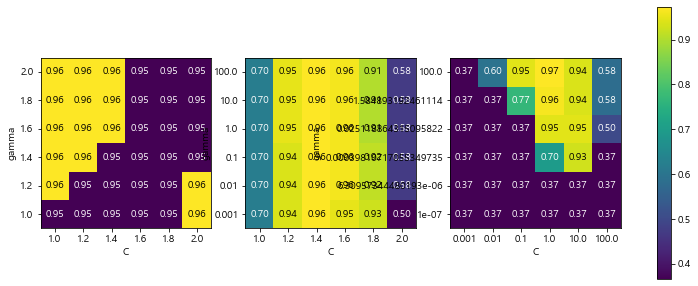

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(13,5))
param_grid_linear = {"C":np.linspace(1, 2, 6), "gamma":np.linspace(1,2,6)}
param_grid_one_log = {"C":np.linspace(1,2,6), "gamma":np.logspace(-3, 2, 6)}
param_grid_range = {"C":np.logspace(-3,2,6), "gamma":np.logspace(-7,2,6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    #print("gamma:", param_grid['gamma'])
    #print("C:", param_grid['C'])
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    #print(scores)
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='C', ylabel='gamma', xticklabels=param_grid["C"],
        yticklabels=param_grid['gamma'], cmap='viridis', ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
plt.show()

In [10]:
param_grid = [{'kernel':['rbf'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]},
             {'kernel':['linear'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
print(param_grid)

[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [11]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [12]:
print("best parameter:", grid_search.best_params_)

best parameter: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [13]:
print("최고 교차 검증 점수: {:.2f}%".format(grid_search.best_score_ * 100))

최고 교차 검증 점수: 97.31%


In [14]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001199,3.992569e-04,0.000400,0.000489,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.001000,5.761645e-07,0.000400,0.000490,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000800,4.002106e-04,0.000600,0.000490,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.001399,4.891239e-04,0.000200,0.000399,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.001199,3.993517e-04,0.000400,0.000490,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.001399,4.899988e-04,0.000000,0.000000,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000800,4.000434e-04,0.001199,0.000400,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000799,7.481505e-04,0.000600,0.000490,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.001000,4.264961e-07,0.000000,0.000000,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.001000,2.431402e-07,0.000000,0.000000,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.347826,0.347826,...,0.366403,0.022485,27,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10, 100],
             "gamma":[0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                        iris.data, iris.target, cv=5)

In [17]:
print("cross val score:", scores)

cross val score: [0.96666667 1.         0.96666667 0.96666667 1.        ]


In [18]:
print("교차 검증 평균 점수:", scores.mean())

교차 검증 평균 점수: 0.9800000000000001


In [19]:
# 불균형 데이터

In [20]:
from sklearn.datasets import load_digits

In [21]:
digits = load_digits()

In [22]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [23]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
y = digits.target == 9  # 일부러 불균형 데이터 생성

In [25]:
y

array([False, False, False, ..., False,  True, False])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [29]:
pred_most_frequent = dummy_majority.predict(X_test)

In [30]:
print("예측된 정답의 고유값:", np.unique(pred_most_frequent))
# 예측된 정답의 고유값: [False]

예측된 정답의 고유값: [False]


In [31]:
print("test accuracy: {:.2f}".format(dummy_majority.score(X_test, y_test)))
# test accuracy: 0.90

test accuracy: 0.90


In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

In [33]:
pred_tree = tree.predict(X_test)

In [34]:
print("예측된 정답의 고유값:", np.unique(pred_tree))
# 예측된 정답의 고유값: [False  True]

예측된 정답의 고유값: [False  True]


In [35]:
print("test acc: {:.2f}%".format(tree.score(X_test, y_test)*100))
# test acc: 91.78%

test acc: 91.78%


In [36]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy acc: {:.2f}".format(dummy.score(X_test, y_test)))

dummy acc: 0.82


In [37]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg acc: {:.2f}".format(logreg.score(X_test, y_test)))

logreg acc: 0.98


In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n", confusion)

오차 행렬:
 [[402   1]
 [  6  41]]


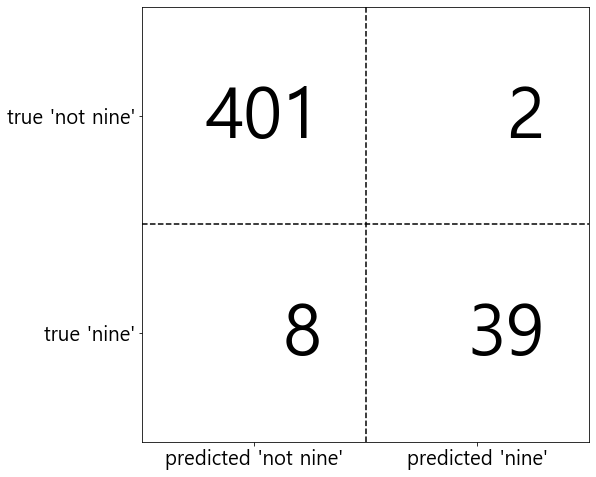

In [40]:
mglearn.plots.plot_confusion_matrix_illustration()

In [43]:
print("frequent dummy:")
print(confusion_matrix(y_test, pred_most_frequent))

frequent dummy:
[[403   0]
 [ 47   0]]


In [44]:
print("무작위 dummy:")
print(confusion_matrix(y_test, pred_dummy))

무작위 dummy:
[[367  36]
 [ 40   7]]


In [45]:
print("결정 트리:")
print(confusion_matrix(y_test, pred_tree))

결정 트리:
[[390  13]
 [ 24  23]]


In [46]:
print("로지스틱 회귀:")
print(confusion_matrix(y_test, pred_logreg))

로지스틱 회귀:
[[402   1]
 [  6  41]]


In [47]:
# f1_score

In [48]:
from sklearn.metrics import f1_score

In [ ]:
# 정밀도 = TP / (TP + FP)
# 재현율 = TP / (TP + FN)
# f1 공식 = 2 * ( (정밀도 * 재현율) / (정밀도 + 재현율) )

In [50]:
print("빈도 기반의 더미 f1 score: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
# 빈도 기반의 더미 f1 score: 0.00

빈도 기반의 더미 f1 score: 0.00


In [51]:
print("무작위 더미 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
# 무작위 더미 f1 score: 0.16

무작위 더미 f1 score: 0.16


In [52]:
print("tree f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
# tree f1 score: 0.55

tree f1 score: 0.55


In [54]:
print("로지스틱 회귀 f1 score: {:.2f}".format(f1_score(y_test, pred_logreg)))
# 로지스틱 회귀 f1 score: 0.92

로지스틱 회귀 f1 score: 0.92
